In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
bakery_df = pd.read_csv("/Users/lindalee/Downloads/BreadBasket_DMS.csv")

In [13]:
bakery_df

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [14]:
bakery_df = bakery_df[bakery_df['Item'] != "NONE"]

In [15]:
bakery_df.shape

(20507, 4)

In [16]:
bakery_df.reset_index(drop=True, inplace=True)

In [18]:
bakery_df.shape

(20507, 4)

In [22]:
bakery_group = bakery_df.groupby(['Date','Time','Transaction'])['Item'].apply(','.join)
bakery_group

Date        Time      Transaction
2016-10-30  09:58:11  1                                                          Bread
            10:05:34  2                                      Scandinavian,Scandinavian
            10:07:57  3                                      Hot chocolate,Jam,Cookies
            10:08:41  4                                                         Muffin
            10:13:03  5                                            Coffee,Pastry,Bread
            10:16:55  6                                        Medialuna,Pastry,Muffin
            10:19:12  7                                    Medialuna,Pastry,Coffee,Tea
            10:20:51  8                                                   Pastry,Bread
            10:21:59  9                                                   Bread,Muffin
            10:25:58  10                                        Scandinavian,Medialuna
            10:27:21  11                                         Bread,Medialuna,Bread
         

In [23]:
combined_bakery = bakery_group.values
comnined_date = [index[0] for index in bakery_group.index]
comnined_time = [index[1] for index in bakery_group.index]
comnined_transaction = [index[2] for index in bakery_group.index]
grouped_dataframe = pd.DataFrame({'Date': comnined_date, 'Time': comnined_time, 'Transaction': comnined_transaction, 'Items': combined_bakery})
grouped_dataframe.head()

,Date,Items,Time,Transaction
0,2016-10-30,Bread,09:58:11,1
1,2016-10-30,"Scandinavian,Scandinavian",10:05:34,2
2,2016-10-30,"Hot chocolate,Jam,Cookies",10:07:57,3
3,2016-10-30,Muffin,10:08:41,4
4,2016-10-30,"Coffee,Pastry,Bread",10:13:03,5


In [24]:
grouped_dataframe = grouped_dataframe[['Transaction', 'Date', 'Time', 'Items']]
grouped_dataframe

,Transaction,Date,Time,Items
0,1,2016-10-30,09:58:11,Bread
1,2,2016-10-30,10:05:34,"Scandinavian,Scandinavian"
2,3,2016-10-30,10:07:57,"Hot chocolate,Jam,Cookies"
3,4,2016-10-30,10:08:41,Muffin
4,5,2016-10-30,10:13:03,"Coffee,Pastry,Bread"
5,6,2016-10-30,10:16:55,"Medialuna,Pastry,Muffin"
6,7,2016-10-30,10:19:12,"Medialuna,Pastry,Coffee,Tea"
7,8,2016-10-30,10:20:51,"Pastry,Bread"
8,9,2016-10-30,10:21:59,"Bread,Muffin"
9,10,2016-10-30,10:25:58,"Scandinavian,Medialuna"


In [25]:
grouped_dataframe = grouped_dataframe.set_index('Transaction')

In [26]:
grouped_dataframe

,Date,Time,Items
Transaction,,,
1,2016-10-30,09:58:11,Bread
2,2016-10-30,10:05:34,"Scandinavian,Scandinavian"
3,2016-10-30,10:07:57,"Hot chocolate,Jam,Cookies"
4,2016-10-30,10:08:41,Muffin
5,2016-10-30,10:13:03,"Coffee,Pastry,Bread"
6,2016-10-30,10:16:55,"Medialuna,Pastry,Muffin"
7,2016-10-30,10:19:12,"Medialuna,Pastry,Coffee,Tea"
8,2016-10-30,10:20:51,"Pastry,Bread"
9,2016-10-30,10:21:59,"Bread,Muffin"


In [27]:
grouped_dataframe.shape

(9465, 3)

In [28]:
grouped_dataframe.reset_index(drop=True, inplace=True)
grouped_dataframe

,Date,Time,Items
0,2016-10-30,09:58:11,Bread
1,2016-10-30,10:05:34,"Scandinavian,Scandinavian"
2,2016-10-30,10:07:57,"Hot chocolate,Jam,Cookies"
3,2016-10-30,10:08:41,Muffin
4,2016-10-30,10:13:03,"Coffee,Pastry,Bread"
5,2016-10-30,10:16:55,"Medialuna,Pastry,Muffin"
6,2016-10-30,10:19:12,"Medialuna,Pastry,Coffee,Tea"
7,2016-10-30,10:20:51,"Pastry,Bread"
8,2016-10-30,10:21:59,"Bread,Muffin"
9,2016-10-30,10:25:58,"Scandinavian,Medialuna"


In [108]:
# function to normalize data

df_onehot = pd.get_dummies(bakery_df[['Item']], prefix="", prefix_sep="")
df_onehot['Transaction'] = bakery_df['Transaction']
df_onehot['Date'] = bakery_df['Date']
df_onehot['Time'] = bakery_df['Time']
fixed_columns = list(df_onehot.columns)
fixed_columns.remove('Transaction')
fixed_columns.remove('Date')
fixed_columns.remove('Time')
new_fixed_columns = ['Transaction', 'Date', 'Time'] + fixed_columns
df_onehot = df_onehot[new_fixed_columns]
df_onehot

,Transaction,Date,Time,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,1,2016-10-30,09:58:11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2016-10-30,10:05:34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2016-10-30,10:05:34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2016-10-30,10:07:57,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2016-10-30,10:07:57,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3,2016-10-30,10:07:57,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,2016-10-30,10:08:41,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5,2016-10-30,10:13:03,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,2016-10-30,10:13:03,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,5,2016-10-30,10:13:03,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
df_stats = df_onehot[fixed_columns]
summary = df_stats.sum(axis=0)
summary_df = pd.DataFrame(summary)
summary_df.rename(columns={0: 'Orders'}, inplace=True)
summary_df

,Orders
Adjustment,1
Afternoon with the baker,44
Alfajores,369
Argentina Night,7
Art Tray,38
Bacon,1
Baguette,152
Bakewell,48
Bare Popcorn,5
Basket,6


In [110]:
summary_df.sort_values(by='Orders', ascending=False, inplace=True)

In [111]:
summary_df

,Orders
Coffee,5471
Bread,3325
Tea,1435
Cake,1025
Pastry,856
Sandwich,771
Medialuna,616
Hot chocolate,590
Cookies,540
Brownie,379


In [112]:
print("Top five orders of all the time:\n")
for i, item in summary_df[:5].iterrows():
    print("{}, ordered {} times,".format(i, item['Orders']))

Top five orders of all the time:

Coffee, ordered 5471 times,
Bread, ordered 3325 times,
Tea, ordered 1435 times,
Cake, ordered 1025 times,
Pastry, ordered 856 times,


In [113]:
print(min(bakery_df['Time']))

01:21:05


In [114]:
print(max(bakery_df['Time']))

23:38:41


In [119]:
print(df_onehot.shape)

(20507, 97)


In [136]:
winter_index = sprint_index = 0
for i, item in df_onehot.iterrows():
    date = item['Date']
    if pd.to_datetime(date) == pd.to_datetime('2016-12-1'):
        winter_index = i
        break

In [137]:
for i, item in df_onehot[4805:].iterrows():
    date = item['Date']
    if pd.to_datetime(date) == pd.to_datetime('2017-3-1'):
        sprint_index = i
        break

In [140]:
autumn = df_onehot.iloc[:winter_index]
winter = df_onehot.iloc[winter_index: sprint_index]
spring = df_onehot.iloc[sprint_index:]

In [141]:
print(autumn.shape)
print(winter.shape)
print(spring.shape)

(4805, 97)
(10601, 97)
(5101, 97)


In [145]:
def dfStats(df):
    df_stats = df[fixed_columns]
    summary_df = pd.DataFrame(df_stats.sum(axis=0))
    summary_df.rename(columns={0: 'Orders'}, inplace=True)
    summary_df.sort_values(by='Orders', ascending=False, inplace=True)
    return summary_df


In [146]:
autumn_stats = dfStats(autumn)
winter_stats = dfStats(winter)
spring_stats = dfStats(spring)

In [152]:
def reportStats(df, name):
    print("Top ten orders of {}:\n".format(name))
    for i, item in df[:10].iterrows():
        print("{}, ordered {} times,".format(i, item['Orders']))

In [153]:
reportStats(autumn_stats, 'Autumn')

Top ten orders of Autumn:

Coffee, ordered 1282 times,
Bread, ordered 765 times,
Tea, ordered 342 times,
Pastry, ordered 237 times,
Medialuna, ordered 221 times,
Muffin, ordered 156 times,
Brownie, ordered 154 times,
Alfajores, ordered 141 times,
Farm House, ordered 124 times,
Hot chocolate, ordered 123 times,


In [154]:
reportStats(winter_stats, 'Winter')

Top ten orders of Winter:

Coffee, ordered 2828 times,
Bread, ordered 1797 times,
Tea, ordered 762 times,
Cake, ordered 590 times,
Sandwich, ordered 425 times,
Pastry, ordered 393 times,
Hot chocolate, ordered 361 times,
Medialuna, ordered 334 times,
Cookies, ordered 287 times,
Scone, ordered 224 times,


In [155]:
reportStats(spring_stats, 'Spring')

Top ten orders of Spring:

Coffee, ordered 1361 times,
Bread, ordered 763 times,
Tea, ordered 331 times,
Cake, ordered 313 times,
Sandwich, ordered 240 times,
Pastry, ordered 226 times,
Cookies, ordered 155 times,
Juice, ordered 126 times,
Hot chocolate, ordered 106 times,
Soup, ordered 104 times,


In [167]:
df_formonth = df_onehot[pd.to_datetime(df_onehot['Date']) <= pd.to_datetime('2017-3-31')]
df_formonth = df_formonth[pd.to_datetime(df_formonth['Date']) >= pd.to_datetime('2016-11-1')]
df_formonth.reset_index(drop=True, inplace=True)
df_formonth.shape

(18981, 97)

In [170]:
def monthDivide(df, targetDate):
    for i, item in enumerate(df['Date']):
        if pd.to_datetime(item) == pd.to_datetime(targetDate):
            return i


In [172]:
november = monthDivide(df_formonth, '2016-12-1')
print(november)

4436


In [174]:
december = monthDivide(df_formonth[november:], '2017-1-1')
print(december)

3339


In [176]:
jan = monthDivide(df_formonth[(november+december):], '2017-2-1')
print(jan)

3356


In [180]:
feb = monthDivide(df_formonth[(november+december+jan):], '2017-3-1')
print(feb)

3906


In [185]:
november_df = df_formonth[:november].reset_index(drop=True)
december_df = df_formonth[november: november+december].reset_index(drop=True)
jan_df = df_formonth[november+december:november+december+jan].reset_index(drop=True)
feb_df = df_formonth[november+december+jan: november+december+jan+feb].reset_index(drop=True)
mar_df = df_formonth[november+december+jan+feb:].reset_index(drop=True)

In [186]:
print(november_df.shape)
print(december_df.shape)
print(jan_df.shape)
print(feb_df.shape)
print(mar_df.shape)

(4436, 97)
(3339, 97)
(3356, 97)
(3906, 97)
(3944, 97)


In [187]:
print(november_df.shape[0]/30)
print(december_df.shape[0]/31)
print(jan_df.shape[0]/31)
print(feb_df.shape[0]/28)
print(mar_df.shape[0]/31)

147
107
108
139
127


In [188]:
november_stats = dfStats(november_df)
december_stats = dfStats(december_df)
jan_stats = dfStats(jan_df)
feb_stats = dfStats(feb_df)
mar_stats = dfStats(mar_df)

In [189]:
reportStats(november_stats, 'November')

Top ten orders of November:

Coffee, ordered 1189 times,
Bread, ordered 712 times,
Tea, ordered 311 times,
Pastry, ordered 218 times,
Medialuna, ordered 208 times,
Brownie, ordered 154 times,
Alfajores, ordered 141 times,
Muffin, ordered 127 times,
Hot chocolate, ordered 118 times,
Cake, ordered 116 times,


In [190]:
reportStats(december_stats, 'December')

Top ten orders of December:

Coffee, ordered 932 times,
Bread, ordered 625 times,
Tea, ordered 235 times,
Medialuna, ordered 141 times,
Cake, ordered 141 times,
Hot chocolate, ordered 138 times,
Sandwich, ordered 129 times,
Pastry, ordered 129 times,
Farm House, ordered 76 times,
Scone, ordered 69 times,


In [191]:
reportStats(jan_stats, 'January')

Top ten orders of January:

Coffee, ordered 892 times,
Bread, ordered 552 times,
Tea, ordered 260 times,
Cake, ordered 194 times,
Sandwich, ordered 128 times,
Pastry, ordered 113 times,
Hot chocolate, ordered 111 times,
Medialuna, ordered 105 times,
Cookies, ordered 100 times,
Toast, ordered 79 times,


In [192]:
reportStats(feb_stats, 'Feburary')

Top ten orders of Feburary:

Coffee, ordered 1004 times,
Bread, ordered 620 times,
Tea, ordered 267 times,
Cake, ordered 255 times,
Sandwich, ordered 168 times,
Pastry, ordered 151 times,
Cookies, ordered 119 times,
Alfajores, ordered 112 times,
Hot chocolate, ordered 112 times,
Soup, ordered 88 times,


In [193]:
reportStats(mar_stats, 'Marth')

Top ten orders of Marth:

Coffee, ordered 1071 times,
Bread, ordered 588 times,
Tea, ordered 258 times,
Cake, ordered 241 times,
Pastry, ordered 185 times,
Sandwich, ordered 183 times,
Cookies, ordered 117 times,
Hot chocolate, ordered 93 times,
Juice, ordered 90 times,
Scone, ordered 86 times,


In [201]:
topfive_nov = november_stats[:5]
topfive_dec = december_stats[:5]
topfive_jan = jan_stats[:5]
topfive_feb = feb_stats[:5]
topfive_mar = mar_stats[:5]
topfives = [topfive_nov,topfive_dec, topfive_jan, topfive_feb, topfive_mar]

In [206]:
coffee = [df.loc['Coffee']['Orders'] for df in topfives]
bread = [df.loc['Bread']['Orders'] for df in topfives]
tea = [df.loc['Tea']['Orders'] for df in topfives]

In [208]:
x = ['November', 'December', 'January', 'Feburary', 'March']

In [210]:
plt.bar(range(5), coffee, width=0.8,color='blue')

<Container object of 5 artists>

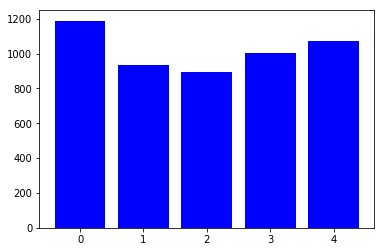

In [211]:
plt.show()